In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import pandas as pd
import numpy as np

In [5]:
# Carga de datos de archivo .csv
# dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
# dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)


dataTraining = pd.read_csv('/Users/carolinafuentes/Downloads/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('/Users/carolinafuentes/Downloads/dataTest_Spotify.csv')

In [6]:
# Calcular la frecuencia de cada clase
freq = dataTraining["popularity"].value_counts()

# Filtrar aquellas clases que aparecen más de una vez
valid_classes = freq[freq > 1].index

# Filtrar el DataFrame original
dataTraining_filtered = dataTraining[dataTraining["popularity"].isin(valid_classes)]

In [7]:
# Definir variable objetivo y features
y = dataTraining_filtered["popularity"]
X = dataTraining_filtered.drop(columns=["popularity","Unnamed: 0", "track_id"])

In [8]:
# División en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [9]:
categorical_cols = ['artists','album_name','track_name','explicit','key','mode','track_genre']
numerical_cols = ['duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']

In [10]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [11]:
# Crear el preprocesador con TargetEncoder para las columnas categóricas y StandardScaler para las numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('target_encoder', ce.TargetEncoder())  # Codificación con TargetEncoder
        ]), categorical_cols),

        ('num', Pipeline([
            ('scaler', StandardScaler())  # Normalización de las variables numéricas
        ]), numerical_cols)
    ])


In [ ]:

# Preprocesar los datos
X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_test_transformed = preprocessor.transform(X_test)


X_train = X_train_transformed
X_test = X_test_transformed

In [12]:
from sklearn.preprocessing import LabelEncoder

# Codificar las clases para que vayan de 0 a n-1
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


y_train = y_train_enc
y_test = y_test_enc

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [5]:
# Definición de modelo Random Forest para un problema de regresión
clf = RandomForestRegressor()
clf

RandomForestRegressor()

n_estimators

In [13]:
# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 310, 10)

# Definición de lista para almacenar el error promedio para cada valor de n_estimators
rmse_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    rmse_scores.append(-score.mean())
    print(estimator,-score.mean())

10 3.689166489394257
20 3.6087171044424147
30 3.566330722403998
40 3.5481208272150067
50 3.5428130689867032
60 3.5349245138985323
70 3.5288667746117857
80 3.529151609687716
90 3.5256120093495995
100 3.5221752594566222
110 3.519859042063001
120 3.518305223792512
130 3.5129223706976247
140 3.5111319859898913
150 3.5087131044639146
160 3.5075585834310465
170 3.506891842116289
180 3.5055705116728384
190 3.5054737827688576
200 3.505546574389322
210 3.505855872094319
220 3.5058583357039184
230 3.5050642273543993
240 3.5040015944421357
250 3.503477757197059
260 3.5042763886638273
270 3.502849475497998
280 3.5029517663352565
290 3.502722858999882
300 3.502027818746958


Text(0, 0.5, 'RMSE')

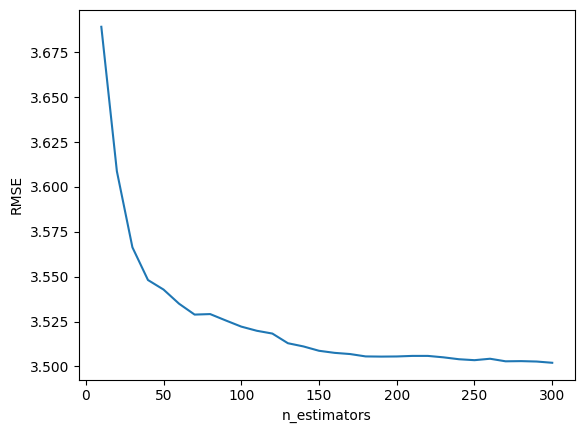

In [14]:
import matplotlib.pyplot as plt
# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')

In [17]:
modelo = RandomForestRegressor(n_estimators=250, random_state=1, n_jobs=-1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculamos RMSE
rmse

np.float64(12.07044420904328)

max_depth

In [18]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
rmse_scores = []


# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    reg = RandomForestRegressor(n_estimators=250,max_depth=depth, random_state=1, n_jobs=-1)
    # Nota: se usa el negativo del RMSE, por eso se multiplica por -1
    score = cross_val_score(reg, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    print(depth,-score.mean())
    rmse_scores.append(-score.mean())

1 12.298639684764218
2 7.325471492399942
3 5.569336305001472
4 4.955310045720396
5 4.551890879374142
6 4.256417113456339
7 4.056340037876704
8 3.922488670779947
9 3.8275508282746125
10 3.749332583428917
11 3.686406515532115
12 3.63819109304812
13 3.5983136743336552
14 3.572969629710565
15 3.549066844175447
16 3.5333769786230356
17 3.5232182965424403
18 3.51404626092349
19 3.5098836459467653
20 3.5100601851025104


Text(0, 0.5, 'MSE')

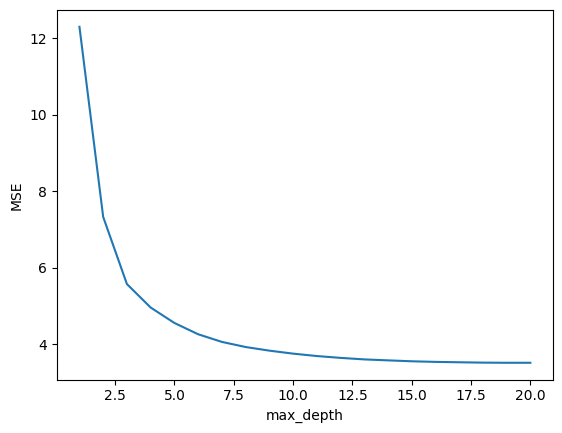

In [19]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [20]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
mejor_rmse, mejor_max_depth = sorted(zip(rmse_scores, max_depth_range))[0]
print(mejor_rmse, mejor_max_depth)

3.5098836459467653 19


In [22]:
modelo = RandomForestRegressor(n_estimators=250, max_depth= 19,random_state=1, n_jobs=-1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculamos RMSE
rmse

np.float64(12.072600712827274)

min_samples_split

In [23]:
# Lista de valores para calibrar el parámetro min_samples_split
min_samples_split_range = range(10, 200, 10)

# Lista para guardar los valores del RMSE para cada valor de min_samples_split
rmse_scores = []

# Loop para obtener el RMSE con diferentes valores de min_samples_split
for min_samples in min_samples_split_range:
    reg = RandomForestRegressor(
        n_estimators=250,
        max_depth= 19,
        min_samples_split=min_samples,
        random_state=1,
        n_jobs=-1
    )
    score = cross_val_score(reg, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    print(f"min_samples_split = {min_samples} -> RMSE: {-score.mean():.4f}")
    rmse_scores.append(-score.mean())


min_samples_split = 10 -> RMSE: 3.5469
min_samples_split = 20 -> RMSE: 3.6120
min_samples_split = 30 -> RMSE: 3.6592
min_samples_split = 40 -> RMSE: 3.6971
min_samples_split = 50 -> RMSE: 3.7322
min_samples_split = 60 -> RMSE: 3.7702
min_samples_split = 70 -> RMSE: 3.8070
min_samples_split = 80 -> RMSE: 3.8406
min_samples_split = 90 -> RMSE: 3.8703
min_samples_split = 100 -> RMSE: 3.8981
min_samples_split = 110 -> RMSE: 3.9227
min_samples_split = 120 -> RMSE: 3.9461
min_samples_split = 130 -> RMSE: 3.9668
min_samples_split = 140 -> RMSE: 3.9868
min_samples_split = 150 -> RMSE: 4.0065
min_samples_split = 160 -> RMSE: 4.0247
min_samples_split = 170 -> RMSE: 4.0388
min_samples_split = 180 -> RMSE: 4.0550
min_samples_split = 190 -> RMSE: 4.0677


Text(0, 0.5, 'MSE')

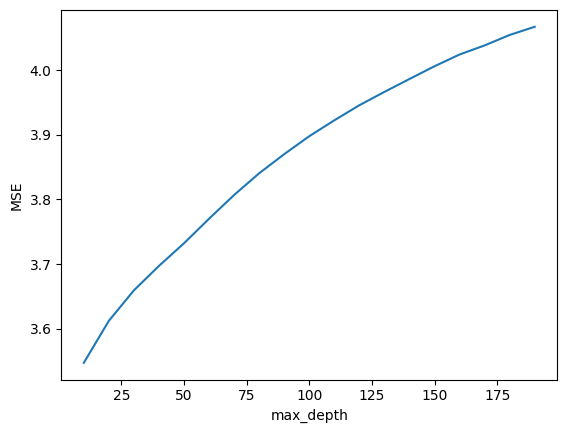

In [24]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(min_samples_split_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [27]:
modelo = RandomForestRegressor(
    n_estimators=250, 
    max_depth= 19,
    min_samples_split = 2,
    random_state=1, n_jobs=-1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculamos RMSE
rmse

np.float64(12.072600712827274)

min_samples_leaf

In [29]:
# Lista de valores para calibrar el parámetro min_samples_split
min_samples_leaf_range = range(1, 12, 2)

# Lista para guardar los valores del RMSE para cada valor de min_samples_split
rmse_scores = []

# Loop para obtener el RMSE con diferentes valores de min_samples_split
for min_samples in min_samples_leaf_range:
    reg = RandomForestRegressor(
        n_estimators=250,
        max_depth= 19,
        min_samples_split=2,
        min_samples_leaf = min_samples,
        random_state=1,
        n_jobs=-1
    )
    score = cross_val_score(reg, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    print(f"min_samples_split = {min_samples} -> RMSE: {-score.mean():.4f}")
    rmse_scores.append(-score.mean())


min_samples_split = 1 -> RMSE: 3.5099
min_samples_split = 3 -> RMSE: 3.5266
min_samples_split = 5 -> RMSE: 3.5732
min_samples_split = 7 -> RMSE: 3.6139
min_samples_split = 9 -> RMSE: 3.6586
min_samples_split = 11 -> RMSE: 3.6927


Text(0, 0.5, 'MSE')

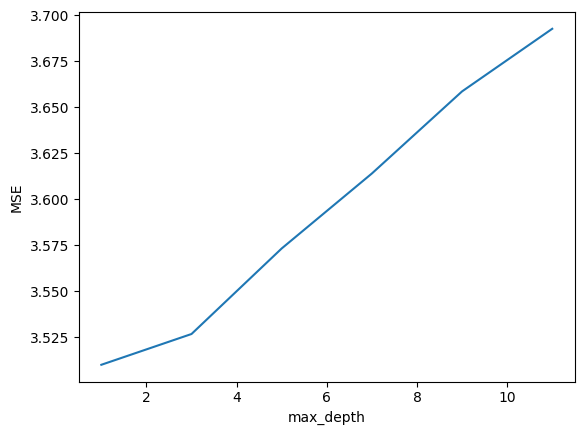

In [30]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(min_samples_leaf_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [31]:
modelo = RandomForestRegressor(
    n_estimators=250, 
    max_depth= 19,
    min_samples_split = 2,
    min_samples_leaf= 1,
    random_state=1, n_jobs=-1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculamos RMSE
rmse

np.float64(12.072600712827274)

max_features

In [32]:
X_train.shape[1]

18

In [33]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, X_train.shape[1]+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
rmse_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestRegressor(n_estimators=250, 
                                max_depth= 19,
                                min_samples_split = 2,
                                min_samples_leaf= 1,
                                max_features=feature, random_state=1, n_jobs=-1)
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    rmse_scores.append(-score.mean())
    print(feature,-score.mean())

1 6.3490615695355865
2 4.636885782230954
3 3.9493632101743423
4 3.652581026009317
5 3.520530978942905
6 3.465147838296232
7 3.435348714251423
8 3.4254048260606047
9 3.4199741396299115
10 3.4178592210955507
11 3.4263442791535277
12 3.427027864426663
13 3.44521741673613
14 3.451672406074952
15 3.459631333483569
16 3.472178280979827
17 3.4948124719915605
18 3.5098836459467653


Text(0, 0.5, 'RMSE')

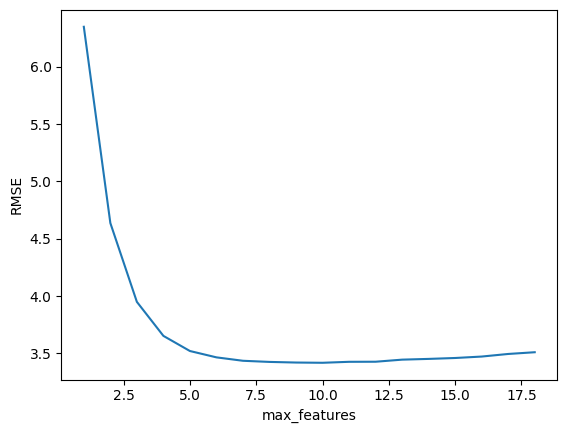

In [34]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, rmse_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE')

In [35]:
modelo = RandomForestRegressor(
    n_estimators=250, 
    max_depth= 19,
    min_samples_split = 2,
    min_samples_leaf= 1,
    max_features=10,
    random_state=1, n_jobs=-1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculamos RMSE
rmse

np.float64(12.309828521637767)

In [13]:
modelo = RandomForestRegressor(
    n_estimators=230, 
    max_depth= 19,
    min_samples_split = 2,
    min_samples_leaf= 1,
    max_features=10,
    bootstrap= False,
    random_state=1, n_jobs=-1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculamos RMSE
rmse

np.float64(12.14771845952373)

In [14]:
modelo = RandomForestRegressor(
    n_estimators=230, 
    max_depth= 19,
    min_samples_split = 2,
    min_samples_leaf= 1,
    max_features=10,
    bootstrap= False,
    random_state=1, n_jobs=-1)

In [15]:
# 4. Crear el pipeline completo
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', modelo)
])

In [16]:
# 5. Entrenar el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['artists', 'album_name',
                                                   'track_name', 'explicit',
                                                   'key', 'mode',
                                                   'track_genre']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_ms',
                                                   'danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('regressor',
                 RandomForestRegressor(bootstrap=False, max_depth=19,
                                       max_features=10, n_estimators=230,
                                       n_jobs=-1, random_state=1))])

In [27]:
# 6. Predecir y evaluar
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 12.15


In [28]:
import joblib
# Exportar modelo a archivo binario .pkl
joblib.dump(pipeline, 'popularity_RF.pkl', compress=3)

['popularity_RF.pkl']

In [13]:
X_train

array([[33.025173777483985, 33.231071993007426, 33.231071993007426, ...,
        0.39356948201689423, 0.08419408519463094, 0.22478748748599323],
       [27.06232895801791, 25.04112404272277, 29.067600813391497, ...,
        1.2278972751600197, 0.5294471835280452, 0.22478748748599323],
       [34.36152171235074, 9.190192844775275, 27.719613745972584, ...,
        -0.5373240279252034, -0.9461257249956716, 0.22478748748599323],
       ...,
       [34.532156736637404, 35.71034640789922, 32.591080577088775, ...,
        0.4746846841280315, 0.19726045619785115, 0.22478748748599323],
       [31.929987249377447, 31.929987249377447, 31.929987249377447, ...,
        -0.8579222076977931, 0.8826042832711218, 0.22478748748599323],
       [26.696815683796615, 36.63237832975239, 36.63237832975239, ...,
        -0.510285627221491, -1.421632258689073, 0.22478748748599323]],
      shape=(55859, 18), dtype=object)

In [38]:
dataTesting_test = preprocessor.transform(dataTesting)

In [48]:
y_pred = modelo.predict(dataTesting_test)

In [29]:
from model_deployment import predict_proba

In [1]:
# Importar modelo y predicción
from model_deployment import predict_proba

# Predicción de probabilidad 
predict_proba('Love and Rockets',	'Love and Rockets',	'Motorcycle',	211533,	False,	0.305,	0.849,	9,	-10.795,	1,	0.0549,	0.0000582,	0.0567,	0.464,	0.32,	141.793,	4,	'goth')

array([33.9941273])

In [ ]:
artists	album_name	track_name	duration_ms	explicit	danceability	energy	key	loudness	mode	speechiness	acousticness	instrumentalness	liveness	valence	tempo	time_signature	track_genre
'Love and Rockets',	'Love and Rockets',	'Motorcycle',	211533,	False,	0.305,	0.849,	9,	-10.795,	1,	0.0549,	0.0000582,	0.0567,	0.464,	0.32,	141.793,	4,	'goth'

In [18]:
pipeline.predict(X_test)

array([5.84776570e+00, 3.10265089e+01, 1.80327455e-02, ...,
       3.44207226e+01, 6.68260870e+00, 4.09579070e+01], shape=(23940,))

In [17]:
X_test

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
40322,Martin Shamoonpour,8 Bit,Renge Aroosi (Old Song),93000,False,0.444,0.920,7,-4.079,1,0.0495,0.144000,0.9360,0.3410,0.965,110.295,1,iranian
57360,Blake Rules;Netherfriends,Kids Trap 15,Peanut Butter,152000,False,0.978,0.419,9,-10.565,1,0.1290,0.395000,0.0000,0.0714,0.813,119.995,4,kids
78981,Agoria;David Carretta,ADN RETROSPECTIVE (Part.1),Mad Max - David Carretta Remix,402400,False,0.582,0.794,2,-8.445,1,0.0377,0.000523,0.2360,0.1410,0.465,129.968,4,french
4016,BTS,"BTS, THE BEST",Film out,216586,False,0.503,0.710,10,-6.382,1,0.0850,0.297000,0.0000,0.3290,0.293,81.932,4,k-pop
78204,Ömer Balık,Crossroad,Crossroad,165000,False,0.658,0.450,1,-13.182,0,0.0499,0.412000,0.7030,0.1390,0.247,96.007,4,deep-house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62813,Don Omar,Halloween 2022 Perreo Vol. 5,Pobre Diabla,255680,False,0.741,0.787,5,-6.228,1,0.0525,0.217000,0.0179,0.0835,0.771,91.993,4,reggae
66099,Allame;Ados,Anakronik,Şehir,201734,False,0.693,0.817,8,-4.541,0,0.1850,0.108000,0.0000,0.1180,0.615,174.008,3,turkish
721,CamelPhat;Elderbrook;ZHU,Cola (ZHU Remix),Cola - ZHU Remix,326444,False,0.865,0.547,1,-7.947,0,0.0617,0.019700,0.6210,0.1110,0.490,123.991,4,deep-house
47307,Сергей Захаров,Вечерний звон,Я встретил Вас,256640,False,0.298,0.345,7,-13.592,0,0.0482,0.974000,0.7100,0.3510,0.211,81.030,5,romance
